# Confidence intervals of a proportion

source: Intuitive Biostatistics 
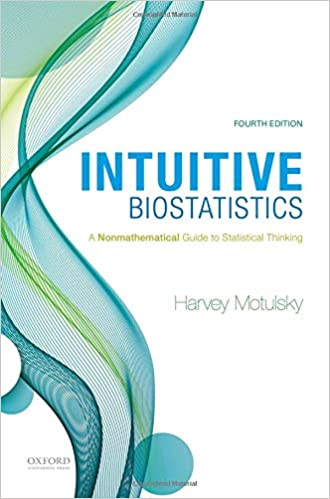



see also: https://en.wikipedia.org/wiki/Confidence_interval

First let's import some packages:

In [3]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

Now let's generate some example data:

### Counting weird cells on a slide
Let's assume you have done an experiment and you are looking at your cells under the microscope and you notice that some cells look weird - they have deformed nuclei. You are excited and you count how many they are, so you count a hundred cells and 10 are weird. But then you wonder: "Damn, I havent done any replicates, couldnt it just be 10 by chance?" "How sure am I that it is really that many?".   

#### Decide how sure you want to be:

In [2]:
confidence_level = 0.95

This means that with your statement in the end you want to be 95% sure. So with a 5% probability you will be wrong. You think that is ok. 

#### Input your data

In [3]:
n = 100
a = 10
prop = a/n
print(prop)

0.1


#### Visualise your data
For example as a pie chart:

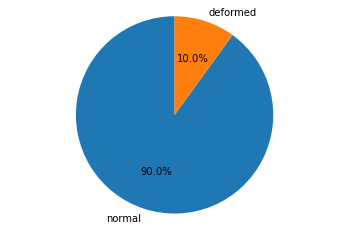

In [4]:
labels = 'normal', 'deformed'
sizes = [n-a,a]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

or as a bar chart:

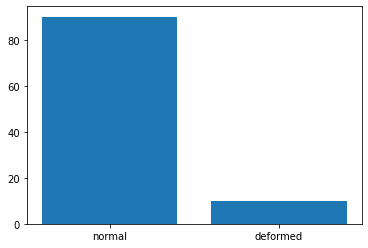

In [5]:
labels = 'normal', 'deformed'
sizes = [n-a,a]
width = 0.4 #this is the width of the bar

fig, ax = plt.subplots()

plt.bar(labels,sizes)

plt.show()

or as a stacked bar chart:

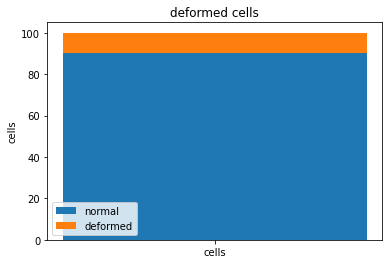

In [6]:
labels = 'normal', 'deformed'
sizes = [n-a,a]
width = 0.4 #this is the width of the bar

fig, ax = plt.subplots()

ax.bar('cells', sizes[0], width)
ax.bar('cells', sizes[1], width, bottom=sizes[0])

ax.set_ylabel('cells')
ax.set_title('deformed cells')
ax.legend(labels)


plt.show()

### Measure of confidence

To calculate a confidence interval from one measurement, we are taking a few assumptions:
- We are looking at a random (or representative) sample!
- They are independent observations!
- The data are accurate!

The confidence intervals we are calculating are confidence intervals of a proportion, this means that they are going back to "binomial variables", which are represented as a proportion. There are several ways to calculate these intervals, the "exact method", the "standard Wald method", the "modified Wald method".    
The details are probably never to become relevant for you, so we will take the default standard implementation in python, the "asymptotic normal approximation". For this we need the measured proportion (a) and the total number (n). It will give us a lower and an upper interval.    

In [7]:
CI= sm.stats.proportion_confint(a, n)
print(CI)

(0.04120108046379837, 0.15879891953620165)


Be careful, when you are dealing with proportions and when with percentages!!!  

Multiply with total cell numbers for the cell count dependent confidence interval:

In [8]:
CI_tot = [n*i for i in CI]
print(CI_tot)

[4.120108046379837, 15.879891953620165]



Multiply with 100 for percentages:

In [9]:
CI_perc = [100*i for i in CI]
print(CI_perc)

[4.120108046379837, 15.879891953620165]


#### Plotting the confidence interval

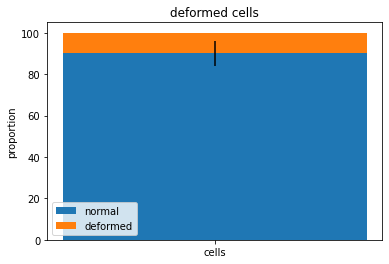

In [10]:
labels = 'normal', 'deformed'
sizes = [(n-a),a]
width = 0.4 #this is the width of the bar
lower_error = n-CI_tot[1] # we are subtracting it from total, because we are plotting the deformed cells on top
upper_error = n-CI_tot[0]
asymmetric_error = [lower_error, upper_error]

fig, ax = plt.subplots()

ax.bar('cells', sizes[0], width)
ax.bar('cells', sizes[1], width, bottom=sizes[0])

ax.set_ylabel('proportion')
ax.set_title('deformed cells')
ax.legend(labels)

ax.vlines('cells', lower_error, upper_error,color='black')

plt.show()

### Questions
Which is wider, a 95% CI or 99%?  
Is it possible to generate a 100% confidence interval?  
Can you compute a confidence level, when you know the proportion, but not the sample size?  
Why is the confidence interval not symmetric?  

### Exercises

1.) How does your confidence interval change if you indeed have 10% deformed nuclei, but you count only 10 cells? Or 1000? Or 10000? 

2.) What happens, if you change the confidence level to 90%? 

3.) Let's explore other ways of visualising the data.  
For this we we use several sources of help, a search engine of your choice (e.g. Google) and a large language model of your choice (e.g. ChatGPT).  
When your first name starts with A-O, you are Team A, when it starts with P-Z, you are Team B.  
Please record your results (in minutes) and put them into the spreadsheet at https://docs.google.com/spreadsheets/d/12brXTJe6kgGRdscdOIyVKklq_uhf9MJP2i97naTVIaY/edit?usp=sharing  
Please also record the prompts and search keywords you used, so that we can discuss them next week.  
If you use a special tool, please put the name into the comment column.  
  
Task A: Please make the plots pretty, meaning that they have bigger numbers and writing, that they are written with Arial and in a colour that has a good contrast to the underlying plot. The legend should not be on top of the data. Choose colours that are typical for films by Wes Anderderson, but also make sure that they are colour-blind friendly. Export them as editable vector graphics.  
Team A, please use a search engine, Team B please use a large language model. Please dont forget to put on a stopwatch. Ready, steady, go!   

Task B:  The following code aimed to implement some graphical advances, but does not quite do what you want. Where is/are the problem(s)? Now Team A, please use an LLM, Team B, please use a search engine. 


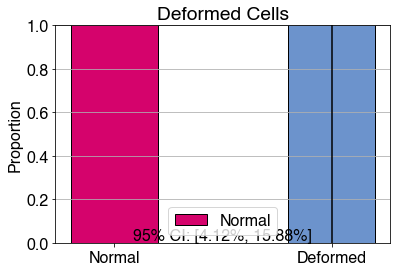

In [21]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set font family and size
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica']
rcParams['font.size'] = 16

# Define variables
confidence_level = 0.95
n = 100
a = 10
prop = a/n

# Calculate confidence interval
CI = sm.stats.proportion_confint(a, n, alpha=1-confidence_level)
CI_tot = [n * i for i in CI]
CI_perc = [100 * i for i in CI]

# Create plot
labels = ['Normal', 'Deformed']
sizes = [(n-a), a]
width = 0.4
lower_error = n - CI_tot[1]
upper_error = n - CI_tot[0]
asymmetric_error = [lower_error, upper_error]

fig, ax = plt.subplots()

# Add bars and error bars
ax.bar(labels, sizes, width, yerr=asymmetric_error, capsize=5, edgecolor='black', linewidth=1, color=['#d5036c', '#6c93cc'])

# Set axis labels, title, and legend
ax.set_ylabel('Proportion')
ax.set_title('Deformed Cells')
ax.legend(['Normal', 'Deformed'])

# Add confidence interval text
CI_text = "95% CI: [{:.2f}%, {:.2f}%]".format(*CI_perc)
plt.text(0.5, 0.01, CI_text, transform=ax.transAxes, ha='center')

# Set limits and grid
ax.set_ylim([0, 1])
ax.yaxis.grid(True)

# Show plot
plt.show()

Task C:  Please now all use an LLM. Reproduce the pie chart from above with R instead of python. To run the code, you can use this website:  
https://rdrr.io/snippets/

Can you also do this with the stacked bar chart, including the error bar?